## WIGHT Data Analysis

'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','SalePrice'

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

Get data, look at its shape


In [2]:
df = pd.read_csv('/home/srwight/Documents/Revature/Batch Projects/Housing Project/revIowaHousing/train.csv')
df.shape

(1460, 81)

Define my features <br>
Look at their descriptions

In [3]:
myFeatures = ['LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath']
df[myFeatures].describe()

,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,5.844521,1515.463699,0.425342,0.057534,1.565068
std,48.623081,525.480383,0.518911,0.238753,0.550916
min,0.000000,334.000000,0.000000,0.000000,0.000000
25%,0.000000,1129.500000,0.000000,0.000000,1.000000
50%,0.000000,1464.000000,0.000000,0.000000,2.000000
75%,0.000000,1776.750000,1.000000,0.000000,2.000000
max,572.000000,5642.000000,3.000000,2.000000,3.000000


##### Look for missing values

LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
dtype: int64

## Feature Engineering

This is where we try to make our features reasonably normal, so that we can use them to create a linear regression.

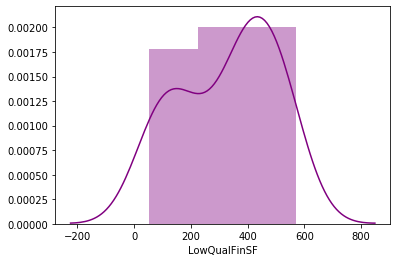

In [12]:
sns.distplot(
    df.LowQualFinSF.loc[df.LowQualFinSF > 0],
    hist=True,
    color='purple'
)

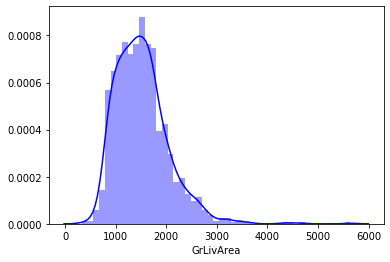

In [13]:
sns.distplot(
    df.GrLivArea,
    hist=True,
    color='blue'
)

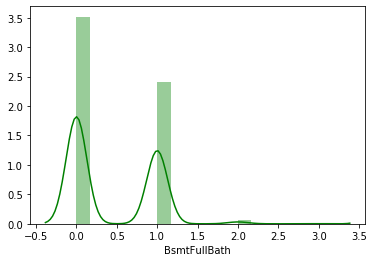

In [18]:
sns.distplot(
    df.BsmtFullBath,
    hist=True,
    color='green'
)

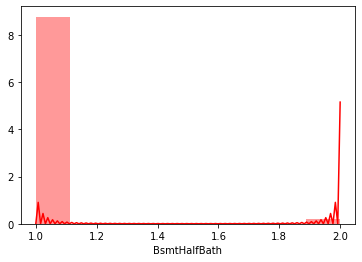

In [24]:
sns.distplot(
    df.BsmtHalfBath.loc[df.BsmtHalfBath > 0],
    hist=True,
    color='red'
)

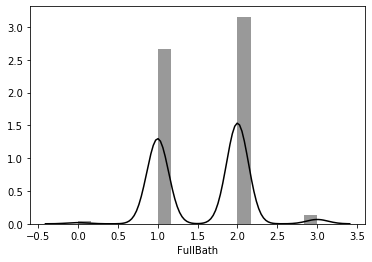

In [23]:
sns.distplot(
    df.FullBath,
    hist=True,
    color='black'
)

Remove Skewedness:

BsmtFullBath is skewed heavily positive, as are BsmtHalfBath, FullBath, and GrLivArea. Ln time!

In [33]:
data_skew = df[myFeatures].apply(skew)

In [10]:
data_skew = data_skew[data_skew > 0.75]

In [11]:
data_skew.index

Index(['LowQualFinSF', 'GrLivArea', 'BsmtHalfBath'], dtype='object')

In [12]:
mydf = df[myFeatures]

In [13]:
mydf

,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
0,0,1710,1,0,2
1,0,1262,0,1,2
2,0,1786,1,0,2
3,0,1717,1,0,1
4,0,2198,1,0,2
...,...,...,...,...,...
1455,0,1647,0,0,2
1456,0,2073,1,0,2
1457,0,2340,0,0,2
1458,0,1078,1,0,1


In [14]:
mydf[data_skew.index] = np.log(mydf[data_skew.index]+1)

/home/srwight/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
mydf

,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
0,0.0,7.444833,1,0.000000,2
1,0.0,7.141245,0,0.693147,2
2,0.0,7.488294,1,0.000000,2
3,0.0,7.448916,1,0.000000,1
4,0.0,7.695758,1,0.000000,2
...,...,...,...,...,...
1455,0.0,7.407318,0,0.000000,2
1456,0.0,7.637234,1,0.000000,2
1457,0.0,7.758333,0,0.000000,2
1458,0.0,6.983790,1,0.000000,1


In [16]:
mydf = ((mydf - mydf.mean())/(mydf.max() - mydf.min()))

In [17]:
mydf.describe()

,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-2.756072e-17,-1.790838e-15,-3.383899e-18,-3.433327e-17,3.805936e-17
std,1.176771e-01,1.180234e-01,1.729702e-01,1.480043e-01,1.836386e-01
min,-1.571654e-02,-5.150001e-01,-1.417808e-01,-3.594136e-02,-5.216895e-01
25%,-1.571654e-02,-8.431067e-02,-1.417808e-01,-3.594136e-02,-1.883562e-01
50%,-1.571654e-02,7.471125e-03,-1.417808e-01,-3.594136e-02,1.449772e-01
75%,-1.571654e-02,7.598750e-02,1.915525e-01,-3.594136e-02,1.449772e-01
max,9.842835e-01,4.849999e-01,8.582192e-01,9.640586e-01,4.783105e-01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f515e0e0f50>,
      dtype=object)

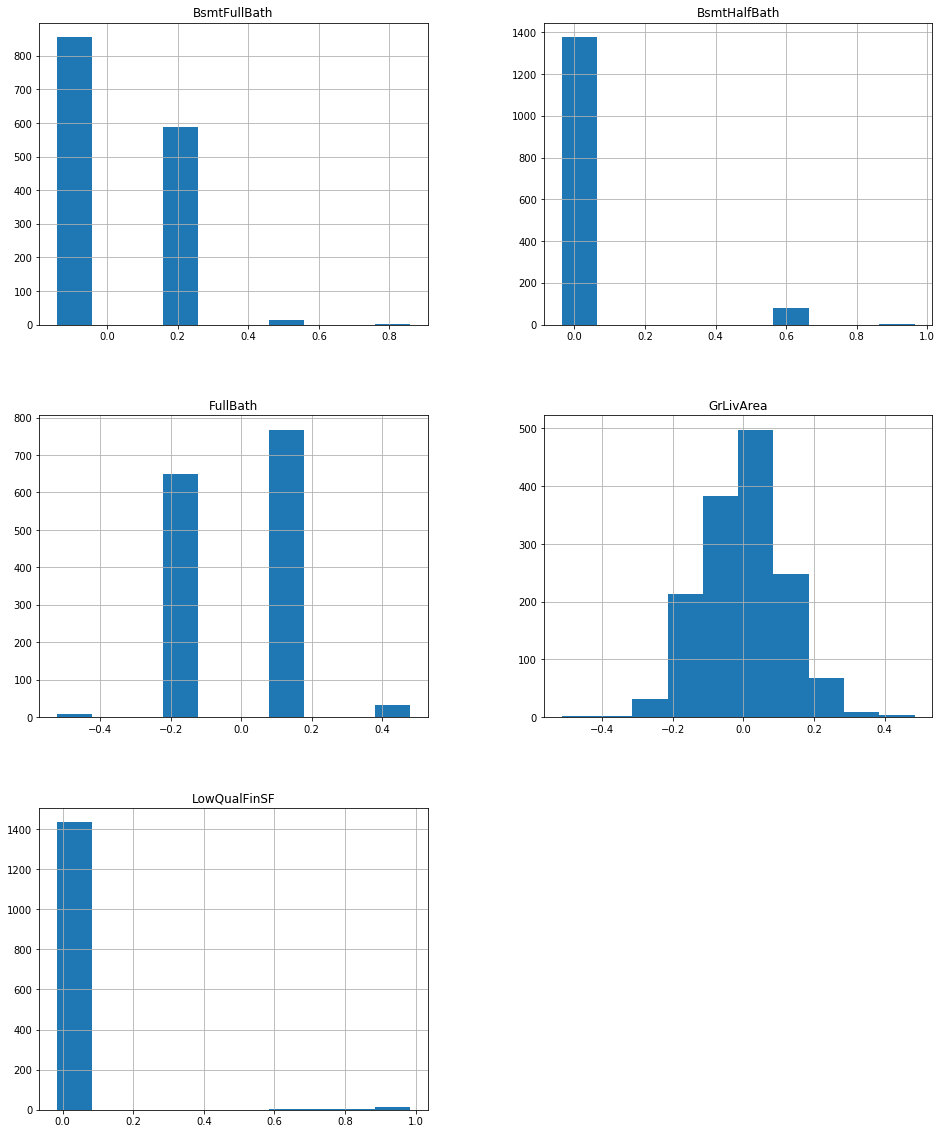

In [18]:
mydf.hist(figsize=(16,20))